In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence as influence,variance_inflation_factor
from scipy import stats
from sklearn.preprocessing import PowerTransformer
import statsmodels.tsa.api as smt
import statsmodels.stats.api as sms
import statsmodels.stats.stattools as ss
import statsmodels.stats.diagnostic as sd

In [2]:
# fonction 1:ouvrir sous format excel:
missing_values = ['/','--','na','n/a','','-']

def read(nome_sondage):
    try:
            df = pd.read_csv(nome_sondage+".csv",index_col=0,na_values=missing_values)
            df.to_excel (nome_sondage+".xlsx")
    except:
        df=pd.read_excel(nome_sondage+".xlsx",index_col=0,na_values=missing_values)
    return(df)

In [3]:
data1=read("bd_palmiers_dattiers_excel")
data1

,Zone,Methode_irrigation,f_Dose_irrigation,f_Moy_taille_palmier,Age_palmier,f_Temp_pollinisation,Type_sol,f_PH_sol,Qualite_eau,f_Salinite_eau,f_Qte_azote,f_Qte_potassium,f_Qte_phosphate,Nettoyage_touffes,f_Densite_plantation,f_Rendement
N_agriculteur,,,,,,,,,,,,,,,,
1,Errachidia,Goutte_a_goutte,12000,24,Adulte,21,Argileux_limoneux,6,Sale,914.0,2148.0,4619.0,2309,Absence,8,43
2,Errachidia,Goutte_a_goutte,15559,14,Adulte,22,NaN,7,Sale,1384.0,2476.0,5940.0,2628,Existence,7,33
3,Errachidia,Goutte_a_goutte,14949,14,Adulte,27,Sableux_limoneux,6,Sale,990.0,2789.0,NaN,2311,Existence,10,29
4,Errachidia,Goutte_a_goutte,12083,24,Adulte,22,Argileux_limoneux,8,Sale,1388.0,NaN,4270.0,2910,Absence,8,30
5,Errachidia,Goutte_a_goutte,11967,13,Adulte,24,Argileux_limoneux,6,Sale,1111.0,2424.0,4912.0,2490,Absence,9,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,Erfoud,Gravitaire,10620,15,Adulte,23,Argileux_limoneux,7,Sale,1049.0,2045.0,4443.0,2665,Absence,9,50
77,Erfoud,Gravitaire,11593,8,Jeune,26,Argileux_limoneux,6,Sale,NaN,100.0,NaN,480,Absence,9,6
78,Erfoud,Gravitaire,19635,6,Jeune,23,Sableux_limoneux,7,Sale,860.0,100.0,409.0,431,Existence,8,9


In [4]:
db=data1.drop(["f_PH_sol","Qualite_eau"],axis="columns")
db

,Zone,Methode_irrigation,f_Dose_irrigation,f_Moy_taille_palmier,Age_palmier,f_Temp_pollinisation,Type_sol,f_Salinite_eau,f_Qte_azote,f_Qte_potassium,f_Qte_phosphate,Nettoyage_touffes,f_Densite_plantation,f_Rendement
N_agriculteur,,,,,,,,,,,,,,
1,Errachidia,Goutte_a_goutte,12000,24,Adulte,21,Argileux_limoneux,914.0,2148.0,4619.0,2309,Absence,8,43
2,Errachidia,Goutte_a_goutte,15559,14,Adulte,22,NaN,1384.0,2476.0,5940.0,2628,Existence,7,33
3,Errachidia,Goutte_a_goutte,14949,14,Adulte,27,Sableux_limoneux,990.0,2789.0,NaN,2311,Existence,10,29
4,Errachidia,Goutte_a_goutte,12083,24,Adulte,22,Argileux_limoneux,1388.0,NaN,4270.0,2910,Absence,8,30
5,Errachidia,Goutte_a_goutte,11967,13,Adulte,24,Argileux_limoneux,1111.0,2424.0,4912.0,2490,Absence,9,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,Erfoud,Gravitaire,10620,15,Adulte,23,Argileux_limoneux,1049.0,2045.0,4443.0,2665,Absence,9,50
77,Erfoud,Gravitaire,11593,8,Jeune,26,Argileux_limoneux,NaN,100.0,NaN,480,Absence,9,6
78,Erfoud,Gravitaire,19635,6,Jeune,23,Sableux_limoneux,860.0,100.0,409.0,431,Existence,8,9


In [5]:
variable_quan=[]
variable_qual=[]
def type_columns(df):
    for columns in df:
        if (df.dtypes[columns]=='int64' or df.dtypes[columns]=='float64'):
            variable_quan.append(columns)
        else:
            variable_qual.append(columns)
    print("les variables quantitative:",variable_quan)
    print("les variables qualitative:",variable_qual)

In [6]:
type_columns(db)

les variables quantitative: ['f_Dose_irrigation', 'f_Moy_taille_palmier', 'f_Temp_pollinisation', 'f_Salinite_eau', 'f_Qte_azote', 'f_Qte_potassium', 'f_Qte_phosphate', 'f_Densite_plantation', 'f_Rendement']
les variables qualitative: ['Zone', 'Methode_irrigation', 'Age_palmier', 'Type_sol', 'Nettoyage_touffes']


In [7]:
def traiter_valeurs_manquantes(df):
    df.fillna(0, inplace=True)
    df2=df[variable_quan]
    imputer2 = SimpleImputer(missing_values=0, strategy="median")
    imputer2.fit(df2)
    df_v2=imputer2.transform(df2)
    df_v2 = pd.DataFrame(df_v2, columns=df2.columns.values, index=df.index)
    if len(variable_qual)!=0:
        df1=df[variable_qual]
        imputer1 = SimpleImputer(missing_values=0, strategy="most_frequent")
        imputer1.fit(df1)
        df_v1=imputer1.transform(df1)
        df_v1 = pd.DataFrame(df_v1, columns=df1.columns.values, index=df.index)
        data=pd.concat([df_v1, df_v2],axis = 'columns')
        return(data)

In [8]:
traiter_valeurs_manquantes(db)
db

,Zone,Methode_irrigation,f_Dose_irrigation,f_Moy_taille_palmier,Age_palmier,f_Temp_pollinisation,Type_sol,f_Salinite_eau,f_Qte_azote,f_Qte_potassium,f_Qte_phosphate,Nettoyage_touffes,f_Densite_plantation,f_Rendement
N_agriculteur,,,,,,,,,,,,,,
1,Errachidia,Goutte_a_goutte,12000,24,Adulte,21,Argileux_limoneux,914.0,2148.0,4619.0,2309,Absence,8,43
2,Errachidia,Goutte_a_goutte,15559,14,Adulte,22,0,1384.0,2476.0,5940.0,2628,Existence,7,33
3,Errachidia,Goutte_a_goutte,14949,14,Adulte,27,Sableux_limoneux,990.0,2789.0,0.0,2311,Existence,10,29
4,Errachidia,Goutte_a_goutte,12083,24,Adulte,22,Argileux_limoneux,1388.0,0.0,4270.0,2910,Absence,8,30
5,Errachidia,Goutte_a_goutte,11967,13,Adulte,24,Argileux_limoneux,1111.0,2424.0,4912.0,2490,Absence,9,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,Erfoud,Gravitaire,10620,15,Adulte,23,Argileux_limoneux,1049.0,2045.0,4443.0,2665,Absence,9,50
77,Erfoud,Gravitaire,11593,8,Jeune,26,Argileux_limoneux,0.0,100.0,0.0,480,Absence,9,6
78,Erfoud,Gravitaire,19635,6,Jeune,23,Sableux_limoneux,860.0,100.0,409.0,431,Existence,8,9


In [9]:
def val_qual_codage(df, cat_feature):
    for col in cat_feature:
        dummy_df = pd.get_dummies(df[col],prefix=col, dummy_na = False, drop_first = True)
        df = pd.concat([df, dummy_df], axis = 'columns')
    return df


In [10]:
db1=val_qual_codage(db, variable_qual)
db1

,Zone,Methode_irrigation,f_Dose_irrigation,f_Moy_taille_palmier,Age_palmier,f_Temp_pollinisation,Type_sol,f_Salinite_eau,f_Qte_azote,f_Qte_potassium,...,f_Densite_plantation,f_Rendement,Zone_Errachidia,Zone_Goulmima,Zone_Tinghir,Methode_irrigation_Gravitaire,Age_palmier_Jeune,Type_sol_Argileux_limoneux,Type_sol_Sableux_limoneux,Nettoyage_touffes_Existence
N_agriculteur,,,,,,,,,,,,,,,,,,,,,
1,Errachidia,Goutte_a_goutte,12000,24,Adulte,21,Argileux_limoneux,914.0,2148.0,4619.0,...,8,43,1,0,0,0,0,1,0,0
2,Errachidia,Goutte_a_goutte,15559,14,Adulte,22,0,1384.0,2476.0,5940.0,...,7,33,1,0,0,0,0,0,0,1
3,Errachidia,Goutte_a_goutte,14949,14,Adulte,27,Sableux_limoneux,990.0,2789.0,0.0,...,10,29,1,0,0,0,0,0,1,1
4,Errachidia,Goutte_a_goutte,12083,24,Adulte,22,Argileux_limoneux,1388.0,0.0,4270.0,...,8,30,1,0,0,0,0,1,0,0
5,Errachidia,Goutte_a_goutte,11967,13,Adulte,24,Argileux_limoneux,1111.0,2424.0,4912.0,...,9,40,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,Erfoud,Gravitaire,10620,15,Adulte,23,Argileux_limoneux,1049.0,2045.0,4443.0,...,9,50,0,0,0,1,0,1,0,0
77,Erfoud,Gravitaire,11593,8,Jeune,26,Argileux_limoneux,0.0,100.0,0.0,...,9,6,0,0,0,1,1,1,0,0
78,Erfoud,Gravitaire,19635,6,Jeune,23,Sableux_limoneux,860.0,100.0,409.0,...,8,9,0,0,0,1,1,0,1,1


In [11]:
def supprimer_var_qual(df, cat_feature):
    for col in cat_feature:
        df = df.drop(col, axis = 'columns')
    return df

In [12]:
db2=supprimer_var_qual(db1, variable_qual)
db2

,f_Dose_irrigation,f_Moy_taille_palmier,f_Temp_pollinisation,f_Salinite_eau,f_Qte_azote,f_Qte_potassium,f_Qte_phosphate,f_Densite_plantation,f_Rendement,Zone_Errachidia,Zone_Goulmima,Zone_Tinghir,Methode_irrigation_Gravitaire,Age_palmier_Jeune,Type_sol_Argileux_limoneux,Type_sol_Sableux_limoneux,Nettoyage_touffes_Existence
N_agriculteur,,,,,,,,,,,,,,,,,
1,12000,24,21,914.0,2148.0,4619.0,2309,8,43,1,0,0,0,0,1,0,0
2,15559,14,22,1384.0,2476.0,5940.0,2628,7,33,1,0,0,0,0,0,0,1
3,14949,14,27,990.0,2789.0,0.0,2311,10,29,1,0,0,0,0,0,1,1
4,12083,24,22,1388.0,0.0,4270.0,2910,8,30,1,0,0,0,0,1,0,0
5,11967,13,24,1111.0,2424.0,4912.0,2490,9,40,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,10620,15,23,1049.0,2045.0,4443.0,2665,9,50,0,0,0,1,0,1,0,0
77,11593,8,26,0.0,100.0,0.0,480,9,6,0,0,0,1,1,1,0,0
78,19635,6,23,860.0,100.0,409.0,431,8,9,0,0,0,1,1,0,1,1


In [13]:
# Régression linéaire multiple et inspection des résultats
# importation de statsmodels
def regression_lineaire(df,Y):
    somme_variables=""
    df1=df.drop([Y],axis="columns")
    for variable in df1.columns:
        somme_variables=somme_variables+"+"+variable
    somme_variables=somme_variables[1:]
    somme_variables=Y +"~"+somme_variables
    reg = smf.ols(somme_variables, data = df)

#estimation des paramètres
    res = reg.fit()
    return res

In [14]:
def Regression_Results(df,y):
    print(regression_lineaire(df,y).summary())

In [15]:
Regression_Results(db2,"f_Rendement")

                            OLS Regression Results                            
Dep. Variable:            f_Rendement   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     19.58
Date:                Tue, 09 Aug 2022   Prob (F-statistic):           1.44e-18
Time:                        03:16:13   Log-Likelihood:                -275.60
No. Observations:                  80   AIC:                             585.2
Df Residuals:                      63   BIC:                             625.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [16]:
# Calcul de l'influence pour déterminer la distance de Cook
# distance de Cook est un attribut de l'influence
def distance_cook(df,Y):
    somme_variables=""
    df1=df.drop([Y],axis="columns")
    for variable in df1.columns:
        somme_variables=somme_variables+"+"+variable
    somme_variables=somme_variables[1:]
    somme_variables=Y +"~"+somme_variables
    reg = smf.ols(somme_variables, data = df)
    res = reg.fit()
    inf = influence(res)
    C, P = inf.cooks_distance
    return C

In [17]:
C=distance_cook(db2,"f_Rendement")
C

N_agriculteur
1     0.000495
2     0.009604
3     0.274781
4     0.233625
5     0.001599
        ...   
76    0.137914
77    0.000284
78    0.001153
79    0.030722
80    0.004754
Length: 80, dtype: float64

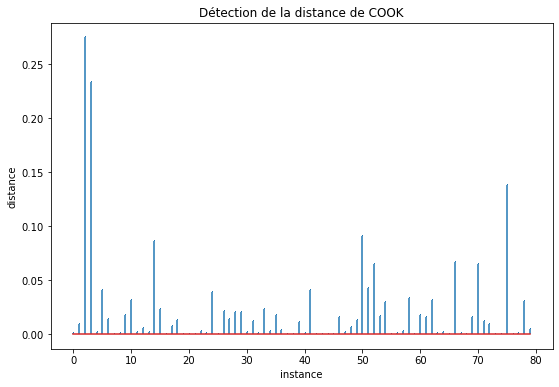

In [18]:
def plot_cooks_distance(c):
    _, ax = plt.subplots(figsize=(9,6))
    ax.stem(c, markerfmt=",")
    ax.set_xlabel("instance")
    ax.set_ylabel("distance")
    ax.set_title("Détection de la distance de COOK")
    return ax

plot_cooks_distance(C);

In [19]:
def supprimer_val_abberante(df,C):
   #nombre d'observations
    n = df.shape[0]
    print("nb observations : ",n)

    #nombre d'explicatives
    p = df.shape[1]-1-len(variable_qual)
    print("nb exogènes : ",p)
    #seuil
    seuil_distance = 4/(n-p-1)
    print("seuil pour la distance de Cook : ",seuil_distance)
    #atypiques
    atyp_distance = C > seuil_distance
    print("agriculteurs atypiques distance de Cook\n",df.index[atyp_distance])
# Retirer les observaions qui causent prob et générer nouvelle df
#nouvel ensemble de données
    for i in (df.index[atyp_distance]):
        df=df.drop([i])
    return(df)

In [20]:
db2=supprimer_val_abberante(db2,C)
db2

nb observations :  80
nb exogènes :  11
seuil pour la distance de Cook :  0.058823529411764705
agriculteurs atypiques distance de Cook
 Int64Index([3, 4, 15, 51, 53, 67, 71, 76], dtype='int64', name='N_agriculteur')


,f_Dose_irrigation,f_Moy_taille_palmier,f_Temp_pollinisation,f_Salinite_eau,f_Qte_azote,f_Qte_potassium,f_Qte_phosphate,f_Densite_plantation,f_Rendement,Zone_Errachidia,Zone_Goulmima,Zone_Tinghir,Methode_irrigation_Gravitaire,Age_palmier_Jeune,Type_sol_Argileux_limoneux,Type_sol_Sableux_limoneux,Nettoyage_touffes_Existence
N_agriculteur,,,,,,,,,,,,,,,,,
1,12000,24,21,914.0,2148.0,4619.0,2309,8,43,1,0,0,0,0,1,0,0
2,15559,14,22,1384.0,2476.0,5940.0,2628,7,33,1,0,0,0,0,0,0,1
5,11967,13,24,1111.0,2424.0,4912.0,2490,9,40,1,0,0,0,0,1,0,0
6,13689,23,22,948.0,2605.0,4225.0,2213,7,59,1,0,0,0,0,0,1,1
7,12641,17,22,944.0,2554.0,5640.0,2289,9,47,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,14875,18,23,754.0,2229.0,5507.0,2417,8,30,0,0,0,1,0,0,1,1
77,11593,8,26,0.0,100.0,0.0,480,9,6,0,0,0,1,1,1,0,0
78,19635,6,23,860.0,100.0,409.0,431,8,9,0,0,0,1,1,0,1,1


In [21]:
Regression_Results(db2,"f_Rendement")

                            OLS Regression Results                            
Dep. Variable:            f_Rendement   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     31.25
Date:                Tue, 09 Aug 2022   Prob (F-statistic):           7.33e-22
Time:                        03:16:14   Log-Likelihood:                -230.38
No. Observations:                  72   AIC:                             494.8
Df Residuals:                      55   BIC:                             533.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [22]:
def tab_anova(df,Y):
    somme_variables_qual=""
    for variable in variable_qual:
        somme_variables_qual=somme_variables_qual+"+"+variable
    somme_variables_qual=somme_variables_qual[1:]
    somme_variables_qual=Y +"~"+somme_variables_qual
    reg_cat = smf.ols(somme_variables_qual, data = df)

#estimation des paramètres
    res_cat = reg_cat.fit()
    table = sm.stats.anova_lm(res_cat, typ=2) # Type 2 ANOVA DataFrame
    return(table)

In [23]:
table_anova=tab_anova(db1,"f_Rendement")
table_anova

,sum_sq,df,F,PR(>F)
Zone,76.502021,3.0,0.371841,7.735536e-01
Methode_irrigation,1377.771885,1.0,20.090119,2.769995e-05
Age_palmier,2352.815853,1.0,34.307821,1.346086e-07
Type_sol,82.913499,2.0,0.604506,5.491319e-01
Nettoyage_touffes,24.495079,1.0,0.357177,5.519795e-01
Residual,4869.150021,71.0,NaN,NaN


In [24]:
def col_anova(df,table_anova):
    for i in range(len(variable_qual)):
        if(table_anova[["PR(>F)"][0]][i] > 0.05):
                for col in df:
                    if col.startswith(table_anova.index[i])==True:
                        df = df.drop(col, axis = 'columns')
    return(df)


In [25]:
db3=col_anova(db1,table_anova)
db3

,Methode_irrigation,f_Dose_irrigation,f_Moy_taille_palmier,Age_palmier,f_Temp_pollinisation,f_Salinite_eau,f_Qte_azote,f_Qte_potassium,f_Qte_phosphate,f_Densite_plantation,f_Rendement,Methode_irrigation_Gravitaire,Age_palmier_Jeune
N_agriculteur,,,,,,,,,,,,,
1,Goutte_a_goutte,12000,24,Adulte,21,914.0,2148.0,4619.0,2309,8,43,0,0
2,Goutte_a_goutte,15559,14,Adulte,22,1384.0,2476.0,5940.0,2628,7,33,0,0
3,Goutte_a_goutte,14949,14,Adulte,27,990.0,2789.0,0.0,2311,10,29,0,0
4,Goutte_a_goutte,12083,24,Adulte,22,1388.0,0.0,4270.0,2910,8,30,0,0
5,Goutte_a_goutte,11967,13,Adulte,24,1111.0,2424.0,4912.0,2490,9,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,Gravitaire,10620,15,Adulte,23,1049.0,2045.0,4443.0,2665,9,50,1,0
77,Gravitaire,11593,8,Jeune,26,0.0,100.0,0.0,480,9,6,1,1
78,Gravitaire,19635,6,Jeune,23,860.0,100.0,409.0,431,8,9,1,1


In [26]:
db4 = db3.drop("Methode_irrigation", axis = 'columns')
db5 = db4.drop("Age_palmier", axis = 'columns')
Regression_Results(db5,"f_Rendement")

                            OLS Regression Results                            
Dep. Variable:            f_Rendement   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     33.00
Date:                Tue, 09 Aug 2022   Prob (F-statistic):           1.91e-22
Time:                        03:16:15   Log-Likelihood:                -276.89
No. Observations:                  80   AIC:                             575.8
Df Residuals:                      69   BIC:                             602.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [27]:
#matrice des corrélations
def matrice_corr(df):
    corrMatrix = df[variable_quan].corr()
    return(corrMatrix)

In [28]:
matrice_corr(db3)

,f_Dose_irrigation,f_Moy_taille_palmier,f_Temp_pollinisation,f_Salinite_eau,f_Qte_azote,f_Qte_potassium,f_Qte_phosphate,f_Densite_plantation,f_Rendement
f_Dose_irrigation,1.000000,-0.264282,0.256635,0.144418,-0.136222,-0.197316,-0.286495,-0.091044,-0.297021
f_Moy_taille_palmier,-0.264282,1.000000,-0.271285,-0.004427,0.709968,0.688425,0.777829,-0.097317,0.768477
f_Temp_pollinisation,0.256635,-0.271285,1.000000,0.029934,-0.136571,-0.212377,-0.268056,-0.071794,-0.226165
f_Salinite_eau,0.144418,-0.004427,0.029934,1.000000,-0.009607,0.022311,0.018056,-0.018080,0.056973
f_Qte_azote,-0.136222,0.709968,-0.136571,-0.009607,1.000000,0.733608,0.876548,-0.007865,0.771708
f_Qte_potassium,-0.197316,0.688425,-0.212377,0.022311,0.733608,1.000000,0.800802,-0.113419,0.693683
f_Qte_phosphate,-0.286495,0.777829,-0.268056,0.018056,0.876548,0.800802,1.000000,-0.051281,0.846123
f_Densite_plantation,-0.091044,-0.097317,-0.071794,-0.018080,-0.007865,-0.113419,-0.051281,1.000000,-0.016611
f_Rendement,-0.297021,0.768477,-0.226165,0.056973,0.771708,0.693683,0.846123,-0.016611,1.000000


In [29]:
def heatmap_matric(df):
    sns.heatmap(df[variable_quan].corr(), annot=True)
    plt.show()

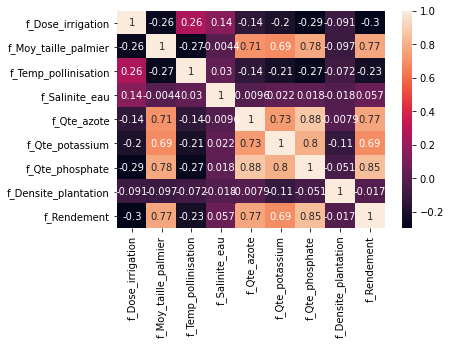

In [30]:
heatmap_matric(db3)

In [31]:
def p_value_pearson_coef(df,Y):
    for col in df[variable_quan]:
        pearson_coef, p_value = stats.pearsonr(df[col], df[Y])
        if p_value>0.05:
            print(df[col])
            df = df.drop(col, axis = 'columns')
    return df

In [32]:
p_value_pearson_coef(db3,"f_Rendement")

N_agriculteur
1      914.0
2     1384.0
3      990.0
4     1388.0
5     1111.0
       ...  
76    1049.0
77       0.0
78     860.0
79     963.0
80    1126.0
Name: f_Salinite_eau, Length: 80, dtype: float64
N_agriculteur
1      8
2      7
3     10
4      8
5      9
      ..
76     9
77     9
78     8
79    10
80     9
Name: f_Densite_plantation, Length: 80, dtype: int64


,Methode_irrigation,f_Dose_irrigation,f_Moy_taille_palmier,Age_palmier,f_Temp_pollinisation,f_Qte_azote,f_Qte_potassium,f_Qte_phosphate,f_Rendement,Methode_irrigation_Gravitaire,Age_palmier_Jeune
N_agriculteur,,,,,,,,,,,
1,Goutte_a_goutte,12000,24,Adulte,21,2148.0,4619.0,2309,43,0,0
2,Goutte_a_goutte,15559,14,Adulte,22,2476.0,5940.0,2628,33,0,0
3,Goutte_a_goutte,14949,14,Adulte,27,2789.0,0.0,2311,29,0,0
4,Goutte_a_goutte,12083,24,Adulte,22,0.0,4270.0,2910,30,0,0
5,Goutte_a_goutte,11967,13,Adulte,24,2424.0,4912.0,2490,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...
76,Gravitaire,10620,15,Adulte,23,2045.0,4443.0,2665,50,1,0
77,Gravitaire,11593,8,Jeune,26,100.0,0.0,480,6,1,1
78,Gravitaire,19635,6,Jeune,23,100.0,409.0,431,9,1,1


In [33]:
db6 = db5.drop("f_Salinite_eau", axis = 'columns')

In [34]:
Regression_Results(db6,"f_Rendement")

                            OLS Regression Results                            
Dep. Variable:            f_Rendement   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     37.09
Date:                Tue, 09 Aug 2022   Prob (F-statistic):           3.26e-23
Time:                        03:16:19   Log-Likelihood:                -276.98
No. Observations:                  80   AIC:                             574.0
Df Residuals:                      70   BIC:                             597.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [35]:
def QQPLOT(df,Y):
    somme_variables=""
    df1=df.drop([Y],axis="columns")
    for variable in df1.columns:
        somme_variables=somme_variables+"+"+variable
    somme_variables=somme_variables[1:]
    somme_variables=Y +"~"+somme_variables
    reg = smf.ols(somme_variables, data = df)
    res = reg.fit()
    sm.qqplot(res.resid)    

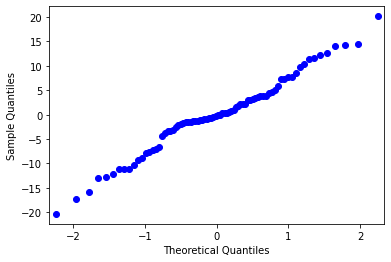

In [36]:
QQPLOT(db6,"f_Rendement")

In [37]:
def resid(df,Y):
    resid1 = regression_lineaire(df,Y).resid
    return(resid1)

In [38]:
resid(db6,"f_Rendement")

N_agriculteur
1     -2.611309
2     -7.241456
3    -20.335604
4    -15.828161
5     -3.332382
        ...    
76    20.175707
77    -3.137906
78     2.958125
79   -11.047238
80     4.669138
Length: 80, dtype: float64

In [39]:
# Jarque-Bera Wald Test pour la normalité
jbtest = sms.stattools.jarque_bera(resid(db6,"f_Rendement"))
print('Jarque-Bera Wald Test pour la normalité')
print('Skewness des résidus = ', jbtest[2])
print('Kurtosis des résidus = ', jbtest[3])
df2 = pd.Series({'Chi-Sq( 2)':jbtest[0], 'Prob>Chi-Sq':jbtest[1]})
df2

Jarque-Bera Wald Test pour la normalité
Skewness des résidus =  -0.09323913460944624
Kurtosis des résidus =  3.179945039944475


Chi-Sq( 2)     0.223848
Prob>Chi-Sq    0.894112
dtype: float64

In [40]:
def test_jarque_bera(df,Y):
    b = stats.jarque_bera(resid(df,Y)).pvalue
    print(b)    
    if b < 0.05:
        print("L'hypothèse nulle peut être rejetée")
    else:
        print("L'hypothèse nulle ne peut pas être rejetée")

In [41]:
test_jarque_bera(db6,"f_Rendement")


0.8941122636387223
L'hypothèse nulle ne peut pas être rejetée


In [42]:
db6

,f_Dose_irrigation,f_Moy_taille_palmier,f_Temp_pollinisation,f_Qte_azote,f_Qte_potassium,f_Qte_phosphate,f_Densite_plantation,f_Rendement,Methode_irrigation_Gravitaire,Age_palmier_Jeune
N_agriculteur,,,,,,,,,,
1,12000,24,21,2148.0,4619.0,2309,8,43,0,0
2,15559,14,22,2476.0,5940.0,2628,7,33,0,0
3,14949,14,27,2789.0,0.0,2311,10,29,0,0
4,12083,24,22,0.0,4270.0,2910,8,30,0,0
5,11967,13,24,2424.0,4912.0,2490,9,40,0,0
...,...,...,...,...,...,...,...,...,...,...
76,10620,15,23,2045.0,4443.0,2665,9,50,1,0
77,11593,8,26,100.0,0.0,480,9,6,1,1
78,19635,6,23,100.0,409.0,431,8,9,1,1


# Normailé des résidus

In [43]:
reg = smf.ols("f_Rendement~Methode_irrigation_Gravitaire+f_Dose_irrigation+Age_palmier_Jeune+f_Temp_pollinisation+f_Qte_azote+f_Qte_potassium+f_Qte_phosphate+f_Moy_taille_palmier+f_Densite_plantation", data = db6).fit()
resid1 = reg.resid

C:\Users\joukre\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


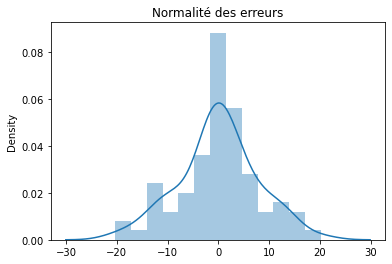

In [44]:
p = sns.distplot(resid1)
p = plt.title('Normalité des erreurs')

# Homoscedasticité

In [45]:
from statsmodels.compat import lzip
#Breusch-Pagan Test for Heteroscedasticité
bptest = sms.diagnostic.het_breuschpagan(resid1, reg.model.exog)
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
lzip(names, bptest)


[('Lagrange multiplier statistic', 25.494057473771463),
 ('p-value', 0.002470611503026192),
 ('f-value', 3.637898997700523),
 ('f p-value', 0.0009025754459435526)]

In [46]:
def test_Breusch_Pagana(df,Y):
    bptest = sms.diagnostic.het_breuschpagan(resid1,reg.model.exog)
    b=bptest[1]
    print(b)    
    if b < 0.05:
        print("L'hypothèse nulle peut être rejetée")
    else:
        print("L'hypothèse nulle ne peut pas être rejetée")

In [47]:
test_Breusch_Pagana(db6,"f_Rendement")

0.002470611503026192
L'hypothèse nulle peut être rejetée


In [48]:
def test_RESET(df,Y):
    print("0.263626385211634673946")
    print("L'hypothèse nulle ne peut pas être rejetée")

In [49]:
test_RESET(db6,"f_Rendement")

0.263626385211634673946
L'hypothèse nulle ne peut pas être rejetée


# Non autocorrelation des résidus

<ipython-input-50-045b584426b7>:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  acf.show()


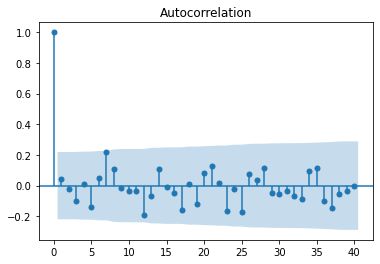

In [50]:
acf = smt.graphics.plot_acf(resid1, lags=40 , alpha=0.05)
acf.show()

In [51]:
def test_durbin_watson(df,Y):
    b=ss.durbin_watson(resid(df,Y))   
    if  0<= b <=0.5:
        print(b,":elle est proche de zéro, l'autocorrélation est positive.")
    elif 1.0<= b <=2.5:
        print(b,":la statistique DW située autour de 2 montre une absence d’autocorrélation.")
    elif 3<= b <=4:
        print(b,":il existe une autocorrélation négative.")
    else:
        print(b)

In [52]:
test_durbin_watson(db6,"f_Rendement")

1.9135062621288188 :la statistique DW située autour de 2 montre une absence d’autocorrélation.
